Clean file: Rename headings, convert numbers to numbers, get rid of wrong types in columns, delete totally empty or uneeded columns

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
from matplotlib import cm

### From excel, save the csv to utf-8 then import, make sure col headings are good too

In [2]:
df = pd.read_csv('Documents\\Research\\Free_little_lib\\DataAnalysis\\bookData.csv')
# check the data frame info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 22 columns):
cataloger           1005 non-null object
bookid              1001 non-null object
count               1005 non-null int64
title               1005 non-null object
author              990 non-null object
yrpub               1005 non-null object
neighborhood        1005 non-null object
collection          1005 non-null object
type                1005 non-null object
age                 1005 non-null object
category1           1005 non-null object
category2           1005 non-null object
publication         989 non-null object
media               989 non-null object
summary             991 non-null object
deweywording        847 non-null object
subjects            473 non-null object
deweydec            846 non-null object
languages           964 non-null object
originalLang        931 non-null object
lcclassification    776 non-null object
isbn                947 non-null object
dty

In [3]:
#Convert Date to Number after removing the question marks (making them NaN)
df['yrpub'] = df['yrpub'].replace('?',None)
df['yrpub']=df['yrpub'].astype(int)
df.yrpub.unique()

array([1990, 1989, 1975, 2012, 1996, 2019, 2007, 1991, 1997, 2004, 1985,
       2005, 2001, 1998, 1988, 1946, 1979, 1983, 1976, 2017, 2018, 2008,
       2002, 1982, 1984, 1974, 1986, 1980, 2003, 1963, 2009, 2006, 2016,
       2011, 1967, 1993, 1999, 2015, 2000, 1994, 1950, 2013, 1960, 1954,
       1977, 1937, 1995, 1981, 2010, 1992, 1961, 1949, 1971, 1987, 1970,
       1962, 2014, 1928, 1978, 1966, 1968, 1958, 1965, 1964, 1959, 1969,
       1973, 1972], dtype=int64)

###  Group the categorical and numeric columns

In [4]:
numerical = [
  'yrpub','count'
]
categorical = [
  'neighborhood','collection','type','age','category1','category2','languages','originalLang'
]

bks = df[numerical + categorical]
bks.shape

(1005, 10)

In [5]:
bks['collection'].head()

0    CentralDistrict2
1    CentralDistrict2
2    CentralDistrict2
3    CentralDistrict5
4       ColumbiaCity2
Name: collection, dtype: object

In [18]:
bks.yrpub.max()

2019

(1900, 2020)

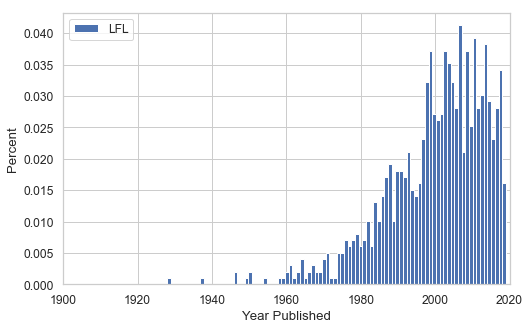

In [31]:
#'Density' Histogram of year published using mtlabplot
#yrhist = bks['yrpub'].plot.hist(bins=50)
#Same thing using seaborn
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    bks['yrpub'], norm_hist=True, kde=False, bins=92, hist_kws={"alpha": 1}
).set(xlabel='Year Published', ylabel='Percent')

plt.legend(labels=['LFL'])
#plt.legend('ABCDEF', ncol=2, loc='upper left')

plt.xlim(1900, 2020)

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Year Published')]

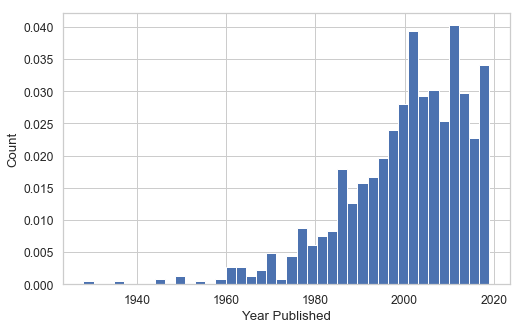

In [21]:
#Histogram of year published using mtlabplot
#yrhist = bks['yrpub'].plot.hist(bins=50)
#Same thing using seaborn
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    bks['yrpub'], norm_hist=False, kde=False, bins=40, hist_kws={"alpha": 1}).set(xlabel='Year Published', ylabel='Count')


In [20]:
#export csv for use with SPL data:
#Save csv file for further testing: 
bks.to_csv('LFL-books-years.csv', mode = 'w', index=False)

## For the analysis, I manually changed "Children's" to Children.  Add something before this to do that automatically.

# Start Analysis

## Year Published

In [2]:
#Open LFL cleaned above data
bks = pd.read_csv('LFL-books-years.csv',encoding='utf-8')
bks.head()

,yrpub,count,neighborhood,collection,type,age,category1,category2,languages,originalLang
0,1990,1,Central District,CentralDistrict2,Fiction,Adult,Anthology/Essays/Short stories,Null,English,NaN
1,1989,1,Central District,CentralDistrict2,Fiction,Adult,Anthology/Essays/Short stories,Null,English,NaN
2,1975,1,Central District,CentralDistrict2,Fiction,Adult,Anthology/Essays/Short stories,Null,English,NaN
3,2012,1,Central District,CentralDistrict5,Fiction,Adult,Anthology/Essays/Short stories,Null,NaN,NaN
4,1996,1,Columbia City,ColumbiaCity2,Fiction,Adult,Anthology/Essays/Short stories,Null,English,English


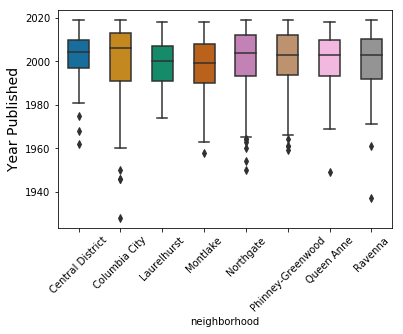

In [3]:
#Plots using Seaborn
bplot = sns.boxplot(y='yrpub', x='neighborhood', data=bks,
                 width=0.5,
                 palette="colorblind")

# add stripplot to boxplot with Seaborn
#bplot=sns.stripplot(y='yrpub', x='neighborhood', data=bks, 
#                   jitter=True, 
#                   marker='o', 
#                   alpha=0.5,
#                   color='black')

#Set y axis label

bplot.set_ylabel("Year Published",
                fontsize=14)

#rotate labels
for item in bplot.get_xticklabels():
    item.set_rotation(45)

### Age Groups

Text(0, 0.5, 'number of books')

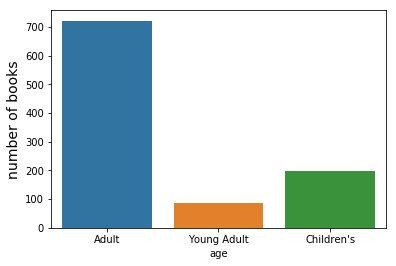

In [6]:
#uses matlibplot to count rows for each type and plot
#agedf = df.age.value_counts().plot(kind='pie') 
#plt.axis('equal')
#plt.title('Number of appearances in dataset')

#Using seaborn
plot = sns.countplot(bks['age']);
plot.set_ylabel("number of books",
                fontsize=14)

### Could chart all the categorical variables at once- but why?

In [8]:
#fig, ax = plt.subplots(2, 4, figsize=(20, 10))
#for variable, subplot in zip(categorical, ax.flatten()):
#    sns.countplot(bks[variable], ax=subplot)
#    for label in subplot.get_xticklabels():
#        label.set_rotation(90)
bks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 10 columns):
yrpub           1005 non-null int32
count           1005 non-null int64
neighborhood    1005 non-null object
collection      1005 non-null object
type            1005 non-null object
age             1005 non-null object
category1       1005 non-null object
category2       1005 non-null object
languages       964 non-null object
originalLang    931 non-null object
dtypes: int32(1), int64(1), object(8)
memory usage: 74.7+ KB


### LFL grouped datasets

### Fiction by neighborhood


In [28]:
#Set up the Dataframe

#Groups count by Neighborhood, collection, and type (fiction or non fiction), calculate percent
bksfiction = bks.groupby(['neighborhood','collection', 'type'])['count'].sum().reset_index()
bksfiction['total'] = bksfiction.groupby('collection')['count'].transform('sum')
bksfiction['percent'] = bksfiction['count']/bksfiction['total']


#Select fiction
fic = bksfiction.loc[bksfiction['type']=='Fiction'].copy() #adding the .copy() gets rid of the settingwithcopywarning

#Sort and reindex so that the chart goes low to hight
fic['median'] = fic.groupby('neighborhood')['percent'].transform('median')
fic = fic.sort_values(by=['median'], ascending=True).reset_index()


In [29]:
#Open SPL fiction dataframe from the Get-SPL-Book-Data-by-hood jupyter file
#Add a laurelhurst row since it is missing
ficSPL = pd.read_csv('SPL-fiction.csv',encoding='utf-8')
laurel = {'neighborhood': ['Laurelhurst'], 'type': ['Fiction'], 'count': [1.0], 'total':[1.0],'percent':[1.2]}
dflaurel = pd.DataFrame(data=laurel)
ficSPL.append(dflaurel, ignore_index=True) # uses ignore_index to create a new index


,neighborhood,type,count,total,percent
0,Central District,Fiction,5485.0,7809.0,0.702395
1,Columbia City,Fiction,14870.0,26486.0,0.561429
2,Montlake,Fiction,7731.0,13001.0,0.594647
3,Northgate,Fiction,16174.0,27569.0,0.586673
4,Phinney-Greenwood,Fiction,22772.0,42934.0,0.530395
5,Queen Anne,Fiction,10197.0,18491.0,0.551457
6,Ravenna,Fiction,42233.0,75000.0,0.563107
7,Laurelhurst,Fiction,1.0,1.0,1.200000


In [30]:
#Get the medians from the LFL data (fic) and sort so that the points go to the right places
medians = fic[['neighborhood','median']].copy()
medians.drop_duplicates(inplace=True)
medians
ficSPLsorted = pd.merge(medians, ficSPL, on='neighborhood', how='outer') #need outer otherwise luarelhusrt is removed. values get replaced by NaN?
ficSPLsorted.sort_values(by=['median'], ascending=True)
ficSPLsorted = ficSPLsorted.fillna('1.2')
ficSPLsorted

,neighborhood,median,type,count,total,percent
0,Montlake,0.494286,Fiction,7731,13001,0.594647
1,Central District,0.616667,Fiction,5485,7809,0.702395
2,Columbia City,0.622159,Fiction,14870,26486,0.561429
3,Northgate,0.629630,Fiction,16174,27569,0.586673
4,Laurelhurst,0.699248,1.2,1.2,1.2,1.2
5,Phinney-Greenwood,0.730769,Fiction,22772,42934,0.530395
6,Queen Anne,0.807692,Fiction,10197,18491,0.551457
7,Ravenna,0.833333,Fiction,42233,75000,0.563107


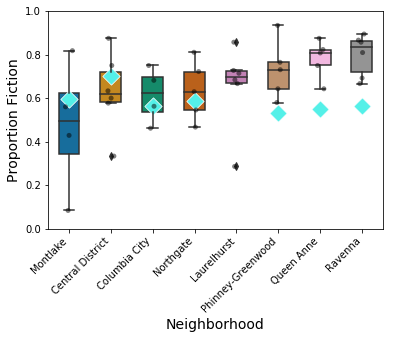

In [31]:
#Make the chart.  This messily hides the value for laurelhurst since it should not be there.


#Plots using Seaborn
bplot = sns.boxplot(y='percent', x='neighborhood', data=fic,
                 width=0.5,
                 palette="colorblind")

# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='percent', x='neighborhood', data=fic, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

# SPL fiction percentages
bplot=sns.scatterplot(y='percent', x='neighborhood', data=ficSPLsorted, marker='D', color='#54f0e8', s=150)


#Set y axis label and scale

bplot.set_ylabel("Proportion Fiction",
                fontsize=14)
bplot.set_xlabel("Neighborhood",
                fontsize=14)
bplot.set(ylim=(0, 1))

#rotate labels
for item in bplot.get_xticklabels():
    item.set_rotation(45)
    item.set_ha('right') #This sets horizontal alignment

In [11]:
bks.age.unique()

array(['Adult', 'Young Adult', "Children's"], dtype=object)

### Boxplot for age

Text(0, 0.5, 'number of books')

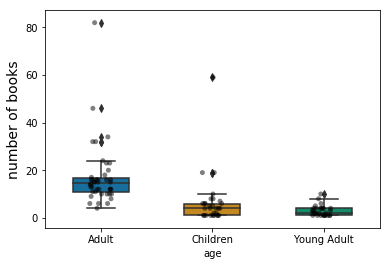

In [19]:
#Groups count by collection and age
bksage = bks.groupby(['neighborhood', 'collection','age'])['count'].sum().reset_index()
#bksage.head()

#Plots using Seaborn
bplot = sns.boxplot(y='count', x='age', data=bksage,
                 width=0.5,
                 palette="colorblind")

# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='count', x='age', data=bksage, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

bplot.set_ylabel("number of books",
                fontsize=14)

## Juvenile books across neighborhoods

In [21]:
#Set up the Dataframe

#Groups count by Neighborhood, collection, and type (fiction or non fiction), calculate percent
bksjuvenile = bks.groupby(['neighborhood','collection', 'age'])['count'].sum().reset_index()
bksjuvenile['total'] = bksjuvenile.groupby('collection')['count'].transform('sum')
bksjuvenile['percent'] = bksjuvenile['count']/bksjuvenile['total']

#bksjuvenile['age']=='Children'
#Select fiction
juv = bksjuvenile.loc[bksjuvenile['age']!='Adult'].copy() #adding the .copy() gets rid of the settingwithcopywarning

#Sort and reindex so that the chart goes low to hight
juv['median'] = juv.groupby('neighborhood')['percent'].transform('median')
juv = juv.sort_values(by=['median'], ascending=True).reset_index()


In [22]:
#Open SPL fiction dataframe from the Get-SPL-Book-Data-by-hood jupyter file
#Add a laurelhurst row since it is missing
juvSPL = pd.read_csv('SPL-juvenilePercent.csv',encoding='utf-8')
laureljuv = {'neighborhood': ['Laurelhurst'], 'ageletter': ['j'], 'count': [1.0], 'total':[1.0],'percent':[1.2]}
dflaureljuv = pd.DataFrame(data=laureljuv)
juvSPL.append(dflaureljuv, ignore_index=True) # uses ignore_index to create a new index


,neighborhood,ageletter,count,total,percent
0,Central District,j,4706.0,7809.0,0.602638
1,Columbia City,j,11587.0,26486.0,0.437476
2,Montlake,j,6266.0,13006.0,0.481778
3,Northgate,j,11591.0,27569.0,0.420436
4,Phinney-Greenwood,j,18297.0,42934.0,0.426166
5,Queen Anne,j,7791.0,18491.0,0.421340
6,Ravenna,j,31327.0,75382.0,0.415577
7,Laurelhurst,j,1.0,1.0,1.200000


In [24]:
#Get the medians from the LFL data and sort so that the points go to the right places
mediansjuv = juv[['neighborhood','median']].copy()
mediansjuv.drop_duplicates(inplace=True)
#medians
juvSPLsorted = pd.merge(mediansjuv, juvSPL, on='neighborhood', how='outer') #need outer otherwise luarelhusrt is removed. values get replaced by NaN?
juvSPLsorted.sort_values(by=['median'], ascending=True)
juvSPLsorted = juvSPLsorted.fillna('1.2')
juvSPLsorted

,neighborhood,median,ageletter,count,total,percent
0,Montlake,0.047619,j,6266,13006,0.481778
1,Northgate,0.066667,j,11591,27569,0.420436
2,Ravenna,0.142857,j,31327,75382,0.415577
3,Laurelhurst,0.142857,1.2,1.2,1.2,1.2
4,Queen Anne,0.166667,j,7791,18491,0.42134
5,Phinney-Greenwood,0.184389,j,18297,42934,0.426166
6,Columbia City,0.227273,j,11587,26486,0.437476
7,Central District,0.233333,j,4706,7809,0.602638


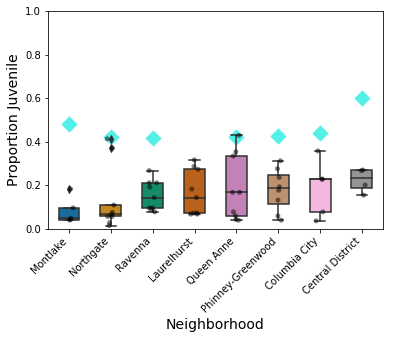

In [25]:
#Make the chart.  This messily hides the value for laurelhurst since it should not be there.


#Plots using Seaborn
bplot = sns.boxplot(y='percent', x='neighborhood', data=juv,
                 width=0.5,
                 palette="colorblind")

# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='percent', x='neighborhood', data=juv, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

# SPL juvenile percentages
bplot=sns.scatterplot(y='percent', x='neighborhood', data=juvSPLsorted, marker='D', color='#54f0e8', s=150)


#Set y axis label and scale

bplot.set_ylabel("Proportion Juvenile",
                fontsize=14)
bplot.set_xlabel("Neighborhood",
                fontsize=14)
bplot.set(ylim=(0, 1))



#rotate labels
for item in bplot.get_xticklabels():
    item.set_rotation(45)
    item.set_ha('right') #This sets horizontal alignment

## Create dataset with LFL volumes and owner intentions.
### books per vol, childrens books per vol, percent children's
Dataframe = bksctstat
Set up a seperate csv with lfl volume and house price. Make sure all numerical columns are number format. Year is okay as int

In [4]:
dfstats = pd.read_csv('lfl-stats.csv')
# check the data frame info


In [5]:
dfstats['vol'] = (dfstats['width']*dfstats['length']*dfstats['height']/1728) #add a vol column with cubic feet units
dfstats = dfstats[np.isfinite(dfstats['vol'])] #Keep rows that have vol
dfstats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 1 to 41
Data columns (total 17 columns):
collection       41 non-null object
width            41 non-null float64
length           41 non-null float64
height           41 non-null float64
volMeters        41 non-null float64
housePrice       41 non-null object
address          41 non-null object
priceLastSold    37 non-null float64
yearLastSold     37 non-null float64
adjPrice         37 non-null float64
specific         41 non-null object
current          41 non-null object
variety          41 non-null object
kids             41 non-null object
religion         41 non-null object
porn             41 non-null object
vol              41 non-null float64
dtypes: float64(8), object(9)
memory usage: 5.8+ KB


In [6]:
#Groups count by collection
bksct = bks.groupby(['neighborhood','collection'])['count'].sum().reset_index()
bksct.head()

,neighborhood,collection,count
0,Central District,CentralDistrict1,4
1,Central District,CentralDistrict2,16
2,Central District,CentralDistrict3,30
3,Central District,CentralDistrict4,26
4,Central District,CentralDistrict5,6


### Books per Volume

In [7]:
#Create a new dataframe of book counts and lfl stats. Inner join is intersection so removes rows with no partner in other dataframe
bksctstat = pd.merge(dfstats, bksct, on='collection', how='inner')

In [8]:
bksctstat.head()

,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,adjPrice,specific,current,variety,kids,religion,porn,vol,neighborhood,count
0,CentralDistrict2,22.0,11.0,12.0,0.047588,"730,824",1829 Martin Luther King Jr. Way,459900.0,2010.0,536554.0424,n,n,n,n,n,n,1.680556,Central District,16
1,CentralDistrict3,23.0,11.0,14.0,0.058043,"667,296",210 30th Ave.,60500.0,1989.0,124155.9225,n,n,n,n,n,n,2.049769,Central District,30
2,CentralDistrict4,16.0,13.5,21.0,0.074332,"764,635",3001 E. Harrison St.,325000.0,2004.0,437730.5987,n,n,n,n,y,n,2.625000,Central District,26
3,CentralDistrict5,13.0,14.5,12.0,0.037067,1278803,331 30th Ave.,757500.0,2013.0,827225.2702,n,n,y,y,n,n,1.309028,Central District,6
4,CentralDistrict6,16.5,9.0,20.0,0.048670,877110,537 Temple Pl.,339000.0,2002.0,479452.9534,n,y,n,n,n,n,1.718750,Central District,10


In [9]:
bksctstat['bkPerVol'] = bksctstat['count']/bksctstat['vol']
bksctstat.head(5)

,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,adjPrice,specific,current,variety,kids,religion,porn,vol,neighborhood,count,bkPerVol
0,CentralDistrict2,22.0,11.0,12.0,0.047588,"730,824",1829 Martin Luther King Jr. Way,459900.0,2010.0,536554.0424,n,n,n,n,n,n,1.680556,Central District,16,9.520661
1,CentralDistrict3,23.0,11.0,14.0,0.058043,"667,296",210 30th Ave.,60500.0,1989.0,124155.9225,n,n,n,n,n,n,2.049769,Central District,30,14.635799
2,CentralDistrict4,16.0,13.5,21.0,0.074332,"764,635",3001 E. Harrison St.,325000.0,2004.0,437730.5987,n,n,n,n,y,n,2.625000,Central District,26,9.904762
3,CentralDistrict5,13.0,14.5,12.0,0.037067,1278803,331 30th Ave.,757500.0,2013.0,827225.2702,n,n,y,y,n,n,1.309028,Central District,6,4.583554
4,CentralDistrict6,16.5,9.0,20.0,0.048670,877110,537 Temple Pl.,339000.0,2002.0,479452.9534,n,y,n,n,n,n,1.718750,Central District,10,5.818182


In [10]:
totalbooks=bksctstat['count'].sum()
totalvol = bksctstat['vol'].sum()
bkdensity = totalbooks/totalvol
print(bkdensity)

7.324626737291971


In [11]:
bksctstat['medianVol'] = bksctstat.groupby('neighborhood')['bkPerVol'].transform('median')
mediansVol = bksctstat[['neighborhood','medianVol']].copy()
mediansVol.drop_duplicates(inplace=True)
mediansVol

,neighborhood,medianVol
0,Central District,9.520661
5,Columbia City,7.233909
10,Laurelhurst,7.132591
16,Montlake,11.760000
20,Northgate,10.633846
25,Phinney-Greenwood,9.376534
30,Queen Anne,9.047966
35,Ravenna,9.926579


In [12]:
bksctstat.bkPerVol.unique()

array([ 9.52066116, 14.63579898,  9.9047619 ,  4.58355438,  5.81818182,
        6.41989069,  7.23390895, 10.10526316, 13.96363636,  4.783391  ,
        7.26923077,  3.67771359,  8.        ,  6.99595142, 11.264     ,
        4.5       , 11.52      , 12.        , 12.40615385,  7.98655462,
       15.95076923, 22.2       ,  3.17516447,  8.86153846, 10.63384615,
        9.81818182,  7.67737526,  9.3765335 , 12.77672727,  7.92874494,
        4.08      ,  9.04796634,  7.85454545, 10.8       , 18.61818182,
        8.22238918, 15.65217391,  5.97923875, 12.08391608, 11.63076923,
        6.4962406 ])

[Text(0, 0.5, 'Books per Cubic Foot'),
 Text(0.5, 0, 'Seattle Little Free Libraries')]

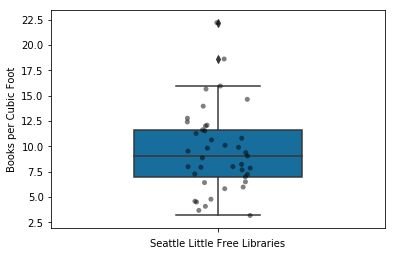

In [86]:
#Plots using Seaborn
bksctstatplot = sns.boxplot(y='bkPerVol', data=bksctstat,
                 width=0.5,
                 palette="colorblind")

# add stripplot to boxplot with Seaborn
bksctstatplot =sns.stripplot(y='bkPerVol', data=bksctstat, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

bksctstatplot.set(xlabel='Seattle Little Free Libraries', ylabel='Books per Cubic Foot')

In [13]:
#Set up the dataframe to plot median book per volume by neighborhood

#Groups count by Neighborhood, calculate median
bksctstat['median'] = bksctstat.groupby('neighborhood')['bkPerVol'].transform('median')
bksctstat = bksctstat.sort_values(by=['median'], ascending=True).reset_index()
bksctstat.head(1)

,index,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,...,variety,kids,religion,porn,vol,neighborhood,count,bkPerVol,medianVol,median
0,14,Laurelhurst5,15.0,15.0,15.0,0.055306,1497532,6116 65th Ave NE,522500.0,2003.0,...,n,n,n,y,1.953125,Laurelhurst,22,11.264,7.132591,7.132591


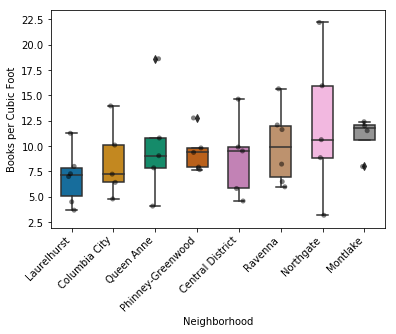

In [88]:
#Plots using Seaborn


bksctstatplot = sns.boxplot(y='bkPerVol', x='neighborhood', data=bksctstat,
                 width=0.5,
                 palette="colorblind")

# add stripplot to boxplot with Seaborn
bksctstatplot=sns.stripplot(y='bkPerVol', x='neighborhood', data=bksctstat, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

bksctstatplot.set(xlabel='Neighborhood', ylabel='Books per Cubic Foot')

#rotate labels
for item in bksctstatplot.get_xticklabels():
    item.set_rotation(45)
    item.set_ha('right')

In [14]:
bksctstat.to_csv('bkstats.csv', mode = 'w', index=False)


In [ ]:
bksctstat = pd.read_csv('bkstats.csv',encoding='utf-8')

# Scatter Plots

## General

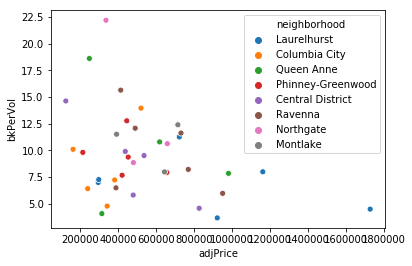

In [17]:
#Adjusted price (price house sold, but in today's dollars) vs books per vol)
bksctadj = sns.scatterplot(y='bkPerVol', x='adjPrice', data=bksctstat,
                 hue='neighborhood')

## Children's

In [89]:
#Create a new dataframe of children's books and lfl stats. Inner join is intersection so removes rows with no partner in other dataframe
bkschil = bksage.loc[bksage['age']=="Children"]
bksstatchil = pd.merge(bksctstat, bkschil, on='collection', how='inner')
bksstatchil.rename(columns = {'count_x':'total_count'}, inplace = True)
bksstatchil.rename(columns = {'count_y':'child_count'}, inplace = True)
bksstatchil.rename(columns = {'neighborhood_x':'neighborhood'}, inplace = True)
bksstatchil=bksstatchil.drop('neighborhood_y',1)
bksstatchil.head()

,index,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,...,porn,vol,neighborhood,total_count,bkPerVol,medianVol,median,age,child_count,total
0,14,Laurelhurst5,15.0,15.0,15.0,0.055306,1497532,6116 65th Ave NE,522500.0,2003.0,...,y,1.953125,Laurelhurst,22,11.264000,7.132591,7.132591,Children,6,22
1,15,Laurelhurst6,16.0,12.0,14.0,0.044048,2298775,3916 NE Surber Dr.,1250000.0,2003.0,...,n,1.555556,Laurelhurst,7,4.500000,7.132591,7.132591,Children,1,7
2,13,Laurelhurst4,19.0,13.0,15.0,0.060714,1922694,6522 50th Ave NE,189070.0,1998.0,...,n,2.144097,Laurelhurst,15,6.995951,7.132591,7.132591,Children,1,15
3,12,Laurelhurst3,18.0,12.0,19.0,0.067252,1746975,6500 55th Ave NE,984000.0,2008.0,...,y,2.375000,Laurelhurst,19,8.000000,7.132591,7.132591,Children,6,19
4,10,Laurelhurst1,16.0,13.0,16.0,0.054536,958935,4709 46th Ave NE,188000.0,1997.0,...,n,1.925926,Laurelhurst,14,7.269231,7.132591,7.132591,Children,1,14


In [90]:
#Divide number of books by volume
bksstatchil['chilbkPerVol'] = bksstatchil['child_count']/bksstatchil['vol']
bksstatchil.head(5)

,index,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,...,vol,neighborhood,total_count,bkPerVol,medianVol,median,age,child_count,total,chilbkPerVol
0,14,Laurelhurst5,15.0,15.0,15.0,0.055306,1497532,6116 65th Ave NE,522500.0,2003.0,...,1.953125,Laurelhurst,22,11.264000,7.132591,7.132591,Children,6,22,3.072000
1,15,Laurelhurst6,16.0,12.0,14.0,0.044048,2298775,3916 NE Surber Dr.,1250000.0,2003.0,...,1.555556,Laurelhurst,7,4.500000,7.132591,7.132591,Children,1,7,0.642857
2,13,Laurelhurst4,19.0,13.0,15.0,0.060714,1922694,6522 50th Ave NE,189070.0,1998.0,...,2.144097,Laurelhurst,15,6.995951,7.132591,7.132591,Children,1,15,0.466397
3,12,Laurelhurst3,18.0,12.0,19.0,0.067252,1746975,6500 55th Ave NE,984000.0,2008.0,...,2.375000,Laurelhurst,19,8.000000,7.132591,7.132591,Children,6,19,2.526316
4,10,Laurelhurst1,16.0,13.0,16.0,0.054536,958935,4709 46th Ave NE,188000.0,1997.0,...,1.925926,Laurelhurst,14,7.269231,7.132591,7.132591,Children,1,14,0.519231


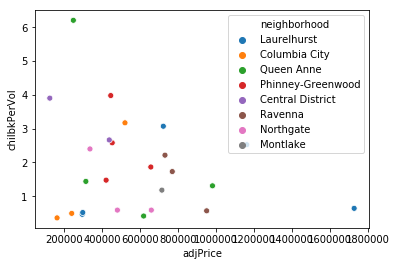

In [91]:
#Adjusted price (price house sold, but in today's dollars) vs children's books per vol)
childbooks = sns.scatterplot(y='chilbkPerVol', x='adjPrice', data=bksstatchil,
                 hue='neighborhood')

In [97]:
#Create a total column
bksage['total'] = bksage.groupby('collection')['count'].transform('sum') #I think this is redundant
bksagechil=bksage.loc[bksage['age']=="Children"] #select the children's books rows
#create a percent column
bksagechil['percent'] = bksagechil['count']/bksagechil['total']
bksagechil.head()


C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,neighborhood,collection,age,count,total,percent
3,Central District,CentralDistrict3,Children,8,30,0.266667
6,Central District,CentralDistrict4,Children,7,26,0.269231
11,Columbia City,ColumbiaCity1,Children,1,13,0.076923
14,Columbia City,ColumbiaCity3,Children,1,28,0.035714
17,Columbia City,ColumbiaCity4,Children,5,22,0.227273


In [98]:
perchilstat = pd.merge(dfstats, bksagechil, on='collection', how='inner')
perchilstat.head()

,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,adjPrice,...,variety,kids,religion,porn,vol,neighborhood,age,count,total,percent
0,CentralDistrict3,23.0,11.00,14.0,0.058043,"667,296",210 30th Ave.,60500.0,1989.0,124155.9225,...,n,n,n,n,2.049769,Central District,Children,8,30,0.266667
1,CentralDistrict4,16.0,13.50,21.0,0.074332,"764,635",3001 E. Harrison St.,325000.0,2004.0,437730.5987,...,n,n,y,n,2.625000,Central District,Children,7,26,0.269231
2,ColumbiaCity1,15.5,10.75,21.0,0.057340,620272,5107 46th Ave S,157000.0,1999.0,239776.6772,...,n,n,n,n,2.024957,Columbia City,Children,1,13,0.076923
3,ColumbiaCity3,21.0,12.00,19.0,0.078461,698514,3080 S Andover St.,117500.0,2003.0,162493.3477,...,n,n,n,n,2.770833,Columbia City,Children,1,28,0.035714
4,ColumbiaCity4,16.5,11.00,15.0,0.044614,579426,3414 35th Ave S.,501500.0,2017.0,520487.1418,...,n,n,y,y,1.575521,Columbia City,Children,5,22,0.227273


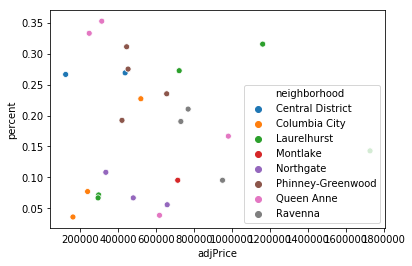

In [99]:
#Adjusted price (price house sold, but in today's dollars) vs percent children's books)
percentChildBks = sns.scatterplot(y='percent', x='adjPrice', data=perchilstat,
                 hue='neighborhood')

#### Checking People's Desires vs the Content

In [100]:
#Mean percent by whether they want kids books or na.  Need to compare to total mean.  Will need to create new dataframe.
bkschilcomp = perchilstat.groupby(['kids'])['percent'].mean().reset_index()
bkschilcomp.head()

,kids,percent
0,n,0.203402
1,y,0.168560


## Religion

In [15]:
#Create a new dataframe of religion books and lfl stats. Inner join is intersection so removes rows with no partner in other dataframe
bksrel = bks.groupby(['neighborhood', 'collection','category1'])['count'].sum().reset_index()
bksrel = bksrel.loc[bksrel['category1']=="Religion"]
bksstatrel = pd.merge(bksctstat, bksrel, on='collection', how='inner')
bksstatrel.rename(columns = {'count_x':'total_count'}, inplace = True)
bksstatrel.rename(columns = {'count_y':'rel_count'}, inplace = True)
bksstatrel.rename(columns = {'neighborhood_y':'neighborhood'}, inplace = True)
#bksstatrel=bksstatchil.drop('neighborhood_x',1)
bksstatrel.head()

,index,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,...,porn,vol,neighborhood_x,total_count,bkPerVol,medianVol,median,neighborhood,category1,rel_count
0,14,Laurelhurst5,15.0,15.00,15.0,0.055306,1497532,6116 65th Ave NE,522500.0,2003.0,...,y,1.953125,Laurelhurst,22,11.264000,7.132591,7.132591,Laurelhurst,Religion,1
1,15,Laurelhurst6,16.0,12.00,14.0,0.044048,2298775,3916 NE Surber Dr.,1250000.0,2003.0,...,n,1.555556,Laurelhurst,7,4.500000,7.132591,7.132591,Laurelhurst,Religion,1
2,5,ColumbiaCity1,15.5,10.75,21.0,0.057340,620272,5107 46th Ave S,157000.0,1999.0,...,n,2.024957,Columbia City,13,6.419891,7.233909,7.233909,Columbia City,Religion,1
3,7,ColumbiaCity3,21.0,12.00,19.0,0.078461,698514,3080 S Andover St.,117500.0,2003.0,...,n,2.770833,Columbia City,28,10.105263,7.233909,7.233909,Columbia City,Religion,1
4,34,QueenAnne5,13.5,11.00,15.0,0.036502,1180137,220 W Howe St.,105000.0,1985.0,...,y,1.289062,Queen Anne,24,18.618182,9.047966,9.047966,Queen Anne,Religion,1


In [115]:
#Calculate Percent
bksstatrel['percent'] = bksstatrel['rel_count']/bksstatrel['total_count']
print("Done!")

In [18]:
#Calculate average percent of religious books in general
bks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 10 columns):
yrpub           1005 non-null int64
count           1005 non-null int64
neighborhood    1005 non-null object
collection      1005 non-null object
type            1005 non-null object
age             1005 non-null object
category1       1005 non-null object
category2       1005 non-null object
languages       964 non-null object
originalLang    931 non-null object
dtypes: int64(2), object(8)
memory usage: 78.6+ KB


#### Checking People's Desires vs the Content

In [116]:
#Mean percent by whether they do not want religios books or na.  Need to compare to total mean.  Will need to create new dataframe.
bksstatrelcomp = bksstatrel.groupby(['religion'])['percent'].mean().reset_index()
bksstatrelcomp.head()

,religion,percent
0,n,0.061941
1,y,0.074086


### Calculate the mean percent of each category

In [29]:
#Get percents of category1 by LFL.  Export the list.  THis is to compare what stewards say to what is in their library
bkscatlfl = bks.groupby(['collection', 'category1'])['count'].sum().reset_index()
#Replace 'Null' with 'Childrens'
bkscatlfl.loc[bkscatlfl.category1 == 'Null', 'category1'] = 'Childrens'
#Create a total column grouped by neighborhood
bkscatlfl['total'] = bkscatlfl.groupby('collection')['count'].transform('sum')
#create a percent column
bkscatlfl['percent'] = bkscatlfl['count']/bkscatlfl['total']
#Sort by the percent
bkscatlfl = bkscatlfl.groupby('collection').apply(pd.DataFrame.sort_values, 'percent', ascending=False)
#Neighborhood column at this point is both the grouping column and a data column, so delete the data one.
bkscatlfl = bkscatlfl.rename(columns={'collection': 'lflname'})

#Save csv file for further testing: 
bkscatlfl.to_csv('categories-by-LFL.csv', mode = 'w', index=False)


#bkscatlfl.head()

#Average percents:
catpercents = bkscatlfl.groupby(['category1'])['percent'].mean().reset_index()
print(catpercents)


                         category1   percent
0   Anthology/Essays/Short stories  0.061450
1                              Art  0.056265
2   Biography/Autobiography/Memoir  0.081795
3              Business/Technology  0.058350
4                        Childrens  0.195503
5                         Classics  0.071097
6                          Cookery  0.132683
7                           Crafts  0.041314
8                 Cultural Studies  0.078824
9                            Drama  0.047245
10                   Graphic/Manga  0.039805
11                         History  0.099543
12                           Music  0.049367
13                         Mystery  0.124428
14                Nature/Gardening  0.052567
15                           Novel  0.237136
16                          Poetry  0.046034
17                       Reference  0.046663
18                        Religion  0.073738
19                         Romance  0.080258
20                   SciFi/Fantasy  0.129233
21        

## Categories by Neighborhood
The resulting pie charts show the top 75% of books


In [19]:
#Look at general categories
#Group by category
bkscatgen = bks.groupby(['category1'])['count'].sum().reset_index()
#Replace 'Null' with 'Childrens'
bkscatgen.loc[bkscatgen.category1 == 'Null', 'category1'] = 'Childrens'
#Get total
bkscatTotal = bks['count'].sum()
#create a percent column
bkscatgen['percent'] = bkscatgen['count']/bkscatTotal
#Sort by the percent
bkscatgen.sort_values(by='percent', ascending=False, inplace=True)
bkscatgen.head(5)


,category1,count,percent
14,Novel,207,0.205970
15,Childrens,181,0.180100
12,Mystery,92,0.091542
20,SciFi/Fantasy,70,0.069652
24,Thriller/Suspense,68,0.067662


## Plot top 75% of books by category

In [42]:
#Get percents of category1 by neighborhood
bkscat = bks.groupby(['neighborhood', 'category1'])['count'].sum().reset_index()
#Replace 'Null' with 'Childrens'
bkscat.loc[bkscat.category1 == 'Null', 'category1'] = 'Childrens'
#Create a total column grouped by neighborhood
bkscat['total'] = bkscat.groupby('neighborhood')['count'].transform('sum')
#create a percent column
bkscat['percent'] = bkscat['count']/bkscat['total']
#Sort by the percent
bkscat = bkscat.groupby('neighborhood').apply(pd.DataFrame.sort_values, 'percent', ascending=False)
#Neighborhood column at this point is both the grouping column and a data column, so delete the data one.
#bkscat = bkscat.drop('neighborhood', 1)
bkscat = bkscat.rename(columns={'neighborhood': 'hoodname'})
#Create a cumulative percent column by neighborhood
bkscat['cumulper'] = bkscat.groupby('neighborhood')['percent'].transform('cumsum')
#Create a new column with categories 75.5 or over in cumulper marked as 'other'
bkscat['newcat'] = np.where(bkscat['cumulper'] < .755, bkscat['category1'], 'Other')
bkscat.head(20)

hoodname                       category1  count  \
neighborhood                                                                   
Central District 10  Central District                           Novel     18   
                 11  Central District                       Childrens     13   
                 17  Central District               Thriller/Suspense      9   
                 8   Central District                         Mystery      7   
                 2   Central District  Biography/Autobiography/Memoir      6   
                 12  Central District                        Religion      6   
                 7   Central District                         History      6   
                 15  Central District                Self Help/Health      5   
                 0   Central District  Anthology/Essays/Short stories      4   
                 5   Central District                Cultural Studies      4   
                 13  Central District                         Romance      3   
                 14  Central District                   SciFi/Fantasy      3   
                 3   Central District             Business/Technology      2   
                 9   Central District                Nature/Gardening      2   
                 1   Central District                             Art      1   
                 6   Central District                   Graphic/Manga      1   
                 4   Central District                          Crafts      1   
                 16  Central District                          Sports      1   
Columbia City    29     Columbia City                           Novel     23   
                 35     Columbia City                Self Help/Health      7   

                     total   percent  cumulper                          newcat  
neighborhood                                                                    
Central District 10     92  0.195652  0.195652                           Novel  
                 11     92  0.141304  0.336957                       Childrens  
                 17     92  0.097826  0.434783               Thriller/Suspense  
                 8      92  0.076087  0.510870                         Mystery  
                 2      92  0.065217  0.576087  Biography/Autobiography/Memoir  
                 12     92  0.065217  0.641304                        Religion  
                 7      92  0.065217  0.706522                         History  
                 15     92  0.054348  0.760870                           Other  
                 0      92  0.043478  0.804348                           Other  
                 5      92  0.043478  0.847826                           Other  
                 13     92  0.032609  0.880435                           Other  
                 14     92  0.032609  0.913043                           Other  
                 3      92  0.021739  0.934783                           Other  
                 9      92  0.021739  0.956522                           Other  
                 1      92  0.010870  0.967391                           Other  
                 6      92  0.010870  0.978261                           Other  
                 4      92  0.010870  0.989130                           Other  
                 16     92  0.010870  1.000000                           Other  
Columbia City    29     85  0.270588  0.270588                           Novel  
                 35     85  0.082353  0.352941                Self Help/Health

In [23]:
#Sum the counts by newcat
bkscatsumall = bkscat.groupby(['neighborhood','newcat'])['count'].sum().reset_index()
bkscatsumall.head()

,neighborhood,newcat,count
0,Central District,Biography/Autobiography/Memoir,6
1,Central District,Childrens,13
2,Central District,History,6
3,Central District,Mystery,7
4,Central District,Novel,19


In [82]:
# THis categorical plot takes raw categorical data, counts and charts it.
#g = sns.catplot("category1", col="neighborhood", col_wrap=1,
#                data=bks,
#                kind="count")
bkscatsumall['neighborhood'].unique()

array(['Central District', 'Columbia City', 'Laurelhurst', 'Montlake',
       'Northgate', 'Phinney-Greenwood', 'Queen Anne', 'Ravenna'],
      dtype=object)

### Plot the categories 

In [24]:
# Remove the 'Other' category
bkscatsum = bkscatsumall[bkscatsumall['newcat'] != 'Other']
catnames = bkscatsum['newcat'].unique() #Create list of neighborhood names 
#These set up the color scheme for the pie charts
cmap = plt.cm.gist_earth
colors = cmap(np.linspace(0., 1., len(catnames)))
labels = catnames

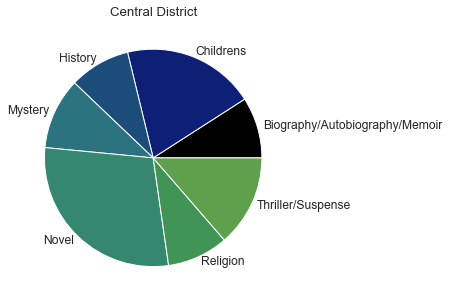

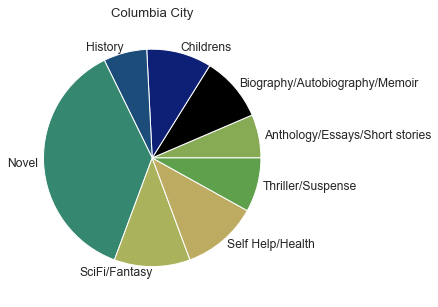

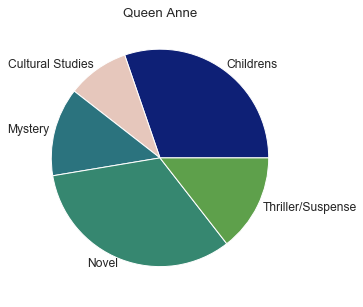

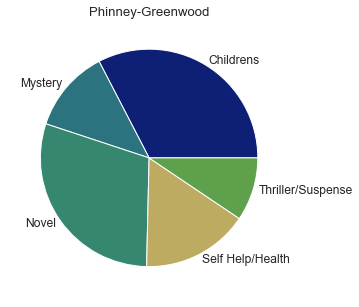

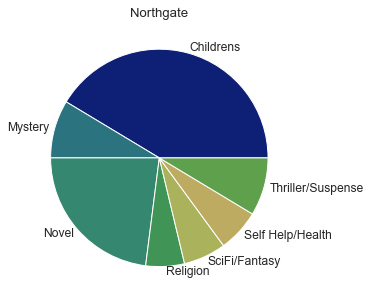

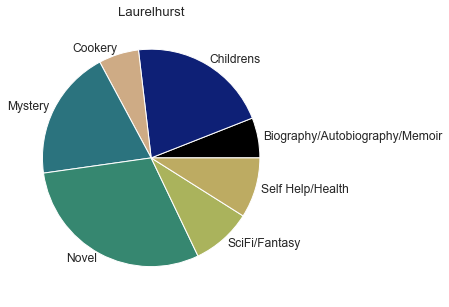

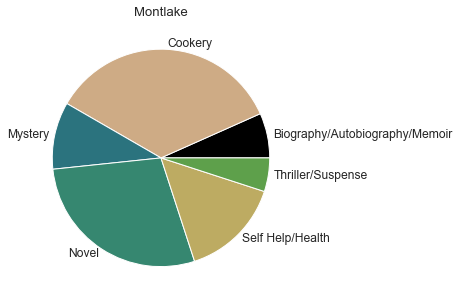

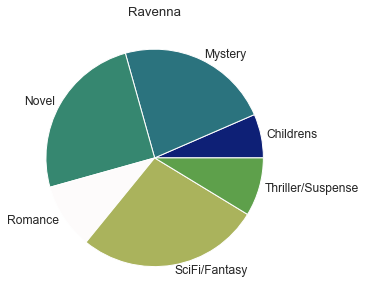

In [26]:
#There's got to be a way to put this all in a loop, but the function mypie assigns colors to the slices based on a dictionary so all colors by category are the same.

#https://stackoverflow.com/questions/35206282/assign-specific-colours-to-data-in-matplotlib-pie-chart
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

#This might be a simpler solution!: https://stackoverflow.com/questions/41787006/making-multiple-pie-charts-out-of-a-pandas-dataframe-one-for-each-row

hood='Central District'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood1='Columbia City'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood1]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood1

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood1]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood2='Queen Anne'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood2]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood2

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood2]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood3='Phinney-Greenwood'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood3]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood3

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood3]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood4='Northgate'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood4]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood4

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood4]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood5='Laurelhurst'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood5]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood5

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood5]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood6='Montlake'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood6]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood6

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood6]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood7='Ravenna'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood7]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood7

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood7]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

plt.show()

## Language

In [46]:
bks.head()

,yrpub,count,neighborhood,collection,type,age,category1,category2,languages,originalLang
0,1990,1,Central District,CentralDistrict2,Fiction,Adult,Anthology/Essays/Short stories,Null,English,NaN
1,1989,1,Central District,CentralDistrict2,Fiction,Adult,Anthology/Essays/Short stories,Null,English,NaN
2,1975,1,Central District,CentralDistrict2,Fiction,Adult,Anthology/Essays/Short stories,Null,English,NaN
3,2012,1,Central District,CentralDistrict5,Fiction,Adult,Anthology/Essays/Short stories,Null,NaN,NaN
4,1996,1,Columbia City,ColumbiaCity2,Fiction,Adult,Anthology/Essays/Short stories,Null,English,English


In [47]:
bks.originalLang.unique()

array([nan, 'English', 'Akkadian', 'Spanish', 'French', 'Latin', 'Arabic',
       'Japanese', 'German', 'Thai', 'Swedish', 'Chinese', 'Undetermined'],
      dtype=object)

In [53]:
#Groups count by Neighborhood, collection, and type (fiction or non fiction), calculate percent
bkslang = bks.groupby(['languages'])['count'].sum().reset_index()
#bkslang['total'] = bksfiction.groupby('collection')['count'].transform('sum')
#bkslang['percent'] = bksfiction['count']/bksfiction['total']
bkslang

,languages,count
0,English,947
1,"English, Achinese",2
2,"English, French",2
3,"English, Italian",1
4,"English, Spanish",1
5,"English, Undetermined",2
6,French,2
7,German,1
8,"Hindi, English",1
9,Spanish,4
